In [1]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from time import time

In [2]:
# Read the data as greyscale 
img = data.camera() # read the image

# Group similar grey levels using n_clusters
# n_clusters = 4 #Change this value
n_clusters = 2 #Change this value

print("K-menas Fitting model")
t0 = time()

# Create a line array, the lazy way
X = img.reshape((-1, 1))
# Define the k-means clustering problem
k_m = KMeans(n_clusters=n_clusters, n_init=4)
# Solve the k-means clustering problem
k_m.fit(X)

# Get the coordinates of the clusters centres as a 1D array
values = k_m.cluster_centers_.squeeze()

# Get the label of each point
labels = k_m.labels_
    
# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = img.shape

# Get the values of min and max intensity in the original image
vmin = img.min()
vmax = img.max()

print("done in %0.3fs." % (time() - t0))

K-menas Fitting model
done in 0.382s.


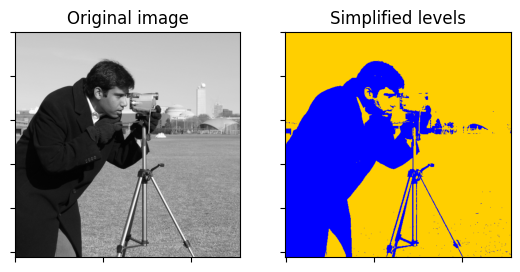

In [3]:
fig = plt.figure(1)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img,cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segm, cmap=plt.cm.jet, vmin=vmin, vmax=vmax)
ax2.set_title('Simplified levels')

# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.show()

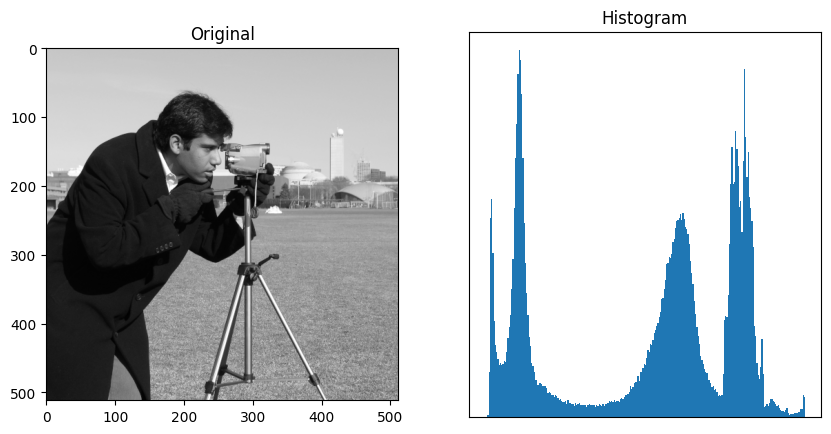

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original')

plt.subplot(122)
plt.hist(img.ravel(), bins=256)
plt.title('Histogram')
    
plt.xticks(())
plt.yticks(())
plt.show()

In [5]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

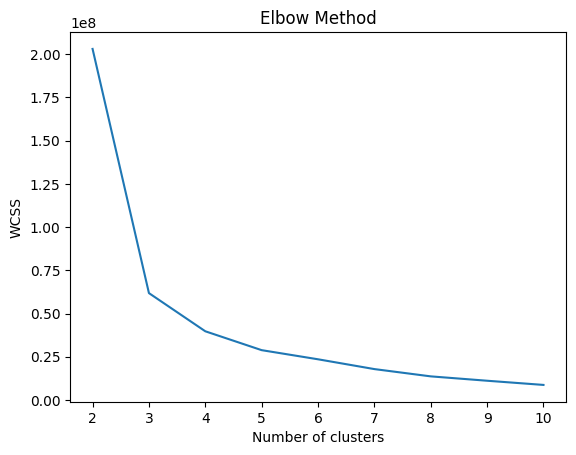

In [6]:
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K-menas Fitting model
done in 0.417s.


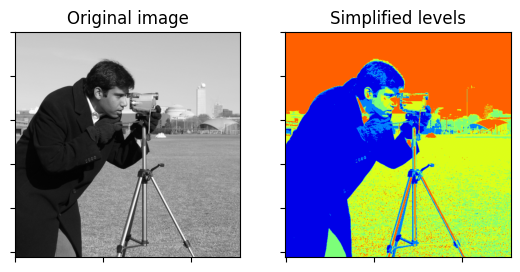

In [7]:
# Group similar grey levels using n_clusters
n_clusters = 5 #Change this value

print("K-menas Fitting model")
t0 = time()

# Create a line array, the lazy way
X = img.reshape((-1, 1))
# Define the k-means clustering problem
k_m = KMeans(n_clusters=n_clusters, n_init=4)
# Solve the k-means clustering problem
k_m.fit(X)

# Get the coordinates of the clusters centres as a 1D array
values = k_m.cluster_centers_.squeeze()

# Get the label of each point
labels = k_m.labels_
    
# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = img.shape

# Get the values of min and max intensity in the original image
vmin = img.min()
vmax = img.max()

print("done in %0.3fs." % (time() - t0))

fig = plt.figure(1)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img,cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segm, cmap=plt.cm.jet, vmin=vmin, vmax=vmax)
ax2.set_title('Simplified levels')

# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.show()